# Library

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, recall_score

# Dataset

In [2]:
df = pd.read_csv("Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Cek Duplikasi pada Dataset

In [5]:
len(df.drop_duplicates()) / len(df)

1.0

## Cek Missing Value

In [6]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= customerID =================


customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64


============= SeniorCitizen =================


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


============= tenure =================


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


============= PhoneService =================


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


============= MultipleLines =================


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= OnlineSecurity =================


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64


============= OnlineBackup =================


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64


============= DeviceProtection =================


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64


============= TechSupport =================


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64


============= StreamingTV =================


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64


============= StreamingMovies =================


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= PaperlessBilling =================


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= MonthlyCharges =================


MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
101.70     1
48.40      1
108.35     1
72.00      1
Name: count, Length: 1585, dtype: int64


============= TotalCharges =================


TotalCharges
20.2      11
          11
19.75      9
19.65      8
19.9       8
          ..
1990.5     1
7362.9     1
346.45     1
306.6      1
108.15     1
Name: count, Length: 6531, dtype: int64


============= Churn =================


Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Missing Value Handling

Kolom dengan Value yang memiliki Missing Value:
1. MultipleLines : No phone service -> No
2. OnlineSecurity : No internet service -> No
3. OnlineBackup : No internet service -> No
4. DeviceProtection : No internet service -> No
5. TechSupport : No internet service -> No
6. StreamingTV : No internet service -> No
7. StreamingMovies : No internet service -> No

#### Imputasi agar bisa digunakan dalam Label Encoding

In [8]:
df['StreamingMovies'] = df['StreamingMovies'].replace({'No internet service':'No'})
df['StreamingTV'] = df['StreamingTV'].replace({'No internet service':'No'})
df['TechSupport'] = df['TechSupport'].replace({'No internet service':'No'})
df['DeviceProtection'] = df['DeviceProtection'].replace({'No internet service':'No'})
df['OnlineBackup'] = df['OnlineBackup'].replace({'No internet service':'No'})
df['OnlineSecurity'] = df['OnlineSecurity'].replace({'No internet service':'No'})
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service':'No'})

In [9]:
custom_columns = [['MultipleLines','OnlineSecurity','OnlineBackup',
                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

for column in custom_columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] =================


MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies
No             No              No            No                No           No           No                 1667
Yes            No              No            No                No           No           No                  552
               Yes             Yes           Yes               Yes          Yes          Yes                 208
               No              Yes           Yes               No           Yes          Yes                 148
No             No              Yes           No                No           No           No                  124
                                                                                                            ... 
               Yes             Yes           Yes               No           Yes          No                    9
Yes            Yes             No            Yes               Yes          Yes          No             

### Imputasi dengan Median untuk Nilai NaN di kolom TotalCharges

In [10]:
# Ganti "-" dengan NaN agar bisa dikonversi ke angka
df['TotalCharges'] = df['TotalCharges'].replace("-", pd.NA)

In [11]:
# Konversi ke numerik, ubah NaN menjadi 0 (atau bisa dibiarkan sebagai NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce').fillna(0).astype(float)

In [12]:
df['TotalCharges'].dtypes

dtype('float64')

In [13]:
df['TotalCharges'].unique()[:20]  # Tampilkan 20 nilai unik pertama

array([  29.85, 1889.5 ,  108.15, 1840.75,  151.65,  820.5 , 1949.4 ,
        301.9 , 3046.05, 3487.95,  587.45,  326.8 , 5681.1 , 5036.3 ,
       2686.05, 7895.15, 1022.95, 7382.25,  528.35, 1862.9 ])

In [14]:
# Menghitung median TotalCharges dari dataset yang tidak bernilai 0
median_total_charges = df[df['TotalCharges'] != 0]['TotalCharges'].median()
median_total_charges

np.float64(1397.475)

In [15]:
# Mengisi nilai NaN di TotalCharges dengan Median karena bersifat integer
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: median_total_charges if x == 0 or pd.isna(x) else x)

##### Detail Value Tiap Kolom di Dataset

In [16]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= customerID =================


customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64


============= SeniorCitizen =================


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


============= Partner =================


Partner
No     3641
Yes    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


============= tenure =================


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


============= PhoneService =================


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


============= MultipleLines =================


MultipleLines
No     4072
Yes    2971
Name: count, dtype: int64


============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= OnlineSecurity =================


OnlineSecurity
No     5024
Yes    2019
Name: count, dtype: int64


============= OnlineBackup =================


OnlineBackup
No     4614
Yes    2429
Name: count, dtype: int64


============= DeviceProtection =================


DeviceProtection
No     4621
Yes    2422
Name: count, dtype: int64


============= TechSupport =================


TechSupport
No     4999
Yes    2044
Name: count, dtype: int64


============= StreamingTV =================


StreamingTV
No     4336
Yes    2707
Name: count, dtype: int64


============= StreamingMovies =================


StreamingMovies
No     4311
Yes    2732
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= PaperlessBilling =================


PaperlessBilling
Yes    4171
No     2872
Name: count, dtype: int64


============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= MonthlyCharges =================


MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
101.70     1
48.40      1
108.35     1
72.00      1
Name: count, Length: 1585, dtype: int64


============= TotalCharges =================


TotalCharges
20.200      11
1397.475    11
19.750       9
19.650       8
19.900       8
            ..
1990.500     1
7362.900     1
346.450      1
306.600      1
108.150      1
Name: count, Length: 6531, dtype: int64


============= Churn =================


Churn
No     5174
Yes    1869
Name: count, dtype: int64

## Cek Outlier

In [17]:
# untuk plot Q-Q
import scipy.stats as stats

In [18]:
def check_plot(df, variable):
    # fungsi mengambil kerangka data (df) dan
    # variabel yang diminati sebagai argumen

    # tentukan ukuran gambar
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # plot Q-Q
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # box plot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

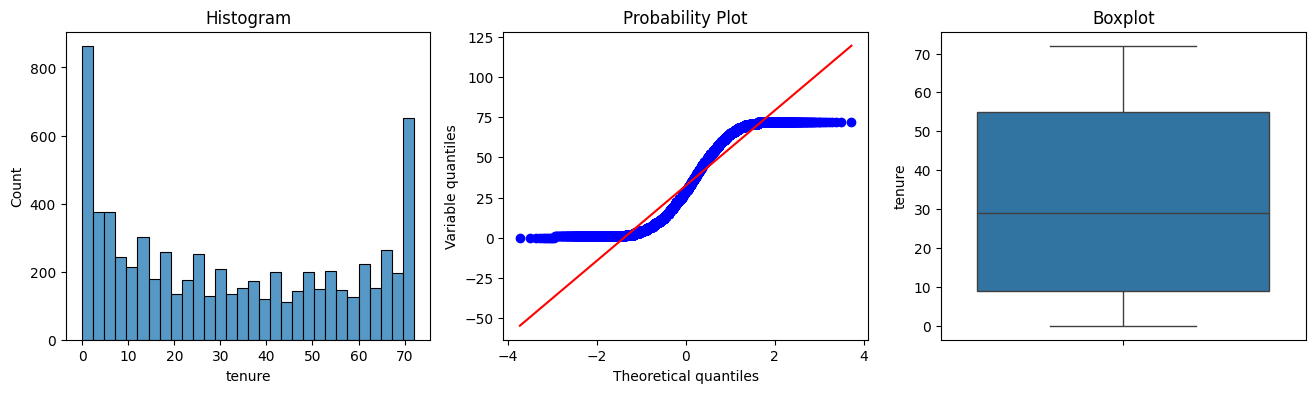

In [19]:
check_plot(df, 'tenure')

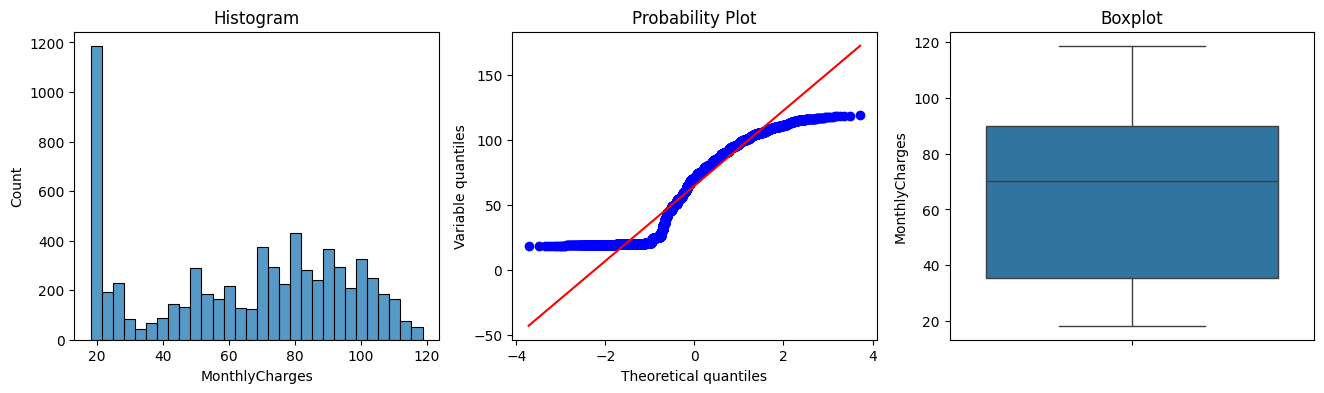

In [20]:
check_plot(df, 'MonthlyCharges')

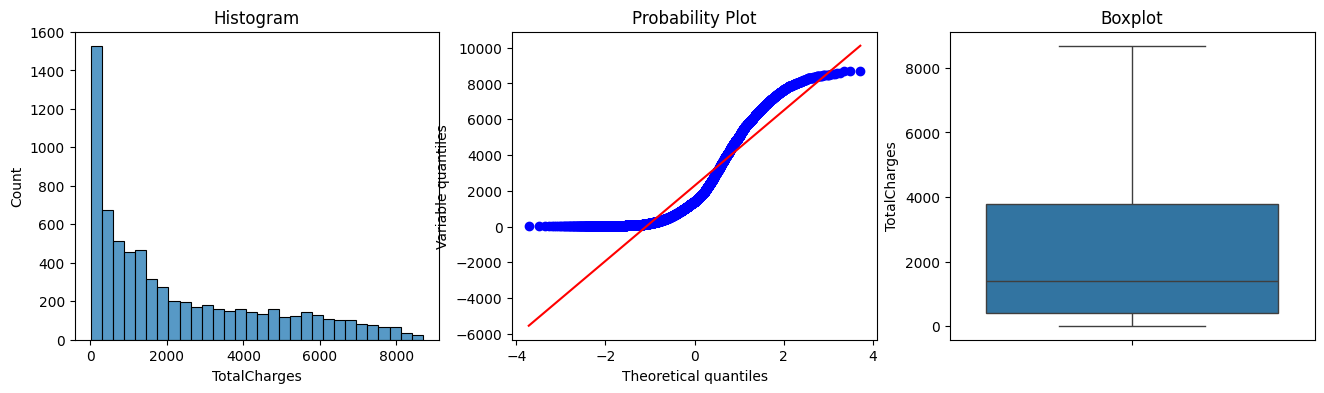

In [21]:
check_plot(df, 'TotalCharges')

In [22]:
def outlier_1 (df, variable) :
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR*1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR*1.5)
    return upper_boundary, lower_boundary

In [23]:
# batas atas dan batas bawah untuk Tenure, MonthlyCharges, dan TotalCharges
tenure_upper, tenure_lower = outlier_1(df, 'tenure')
tenure_upper, tenure_lower

(np.float64(124.0), np.float64(-60.0))

In [24]:
monthly_upper, monthly_lower = outlier_1(df, 'MonthlyCharges')
monthly_upper, monthly_lower

(np.float64(171.375), np.float64(-46.02499999999999))

In [25]:
Total_upper, Total_lower = outlier_1(df, 'TotalCharges')
Total_upper, Total_lower

(np.float64(8863.1625), np.float64(-4674.3375))

In [26]:
# Trimming atau drop value outlier -> pengurangan baris
# Trimming outliers from the Dataset
df = df[(df['tenure'] <= tenure_upper) & (df['tenure'] >= tenure_lower)]
df = df[(df['MonthlyCharges'] <= monthly_upper) & (df['MonthlyCharges'] >= monthly_lower)]
df_new = df[(df['TotalCharges'] <= Total_upper) & (df['TotalCharges'] >= Total_lower)]

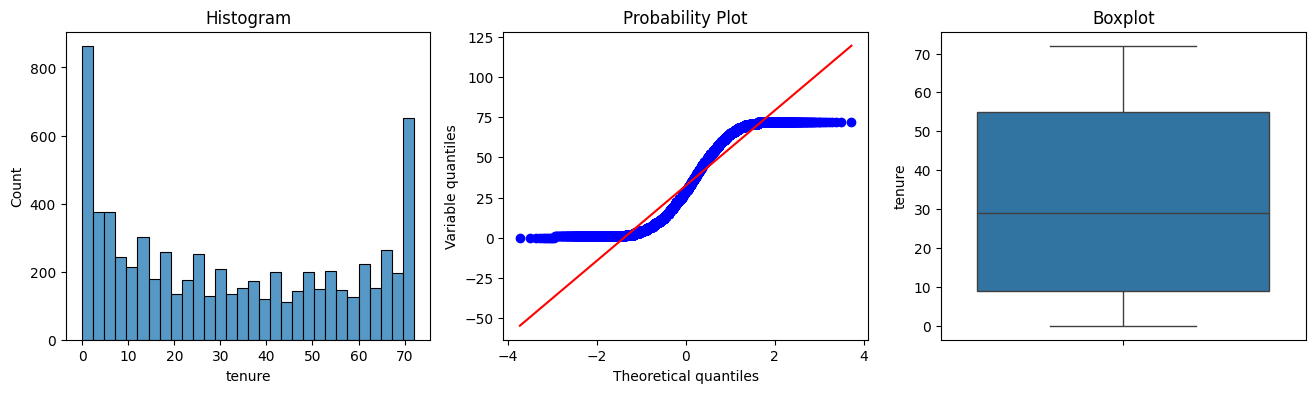

In [27]:
# memvisualisasikan setelah outlier handling di tenure
check_plot(df,'tenure')

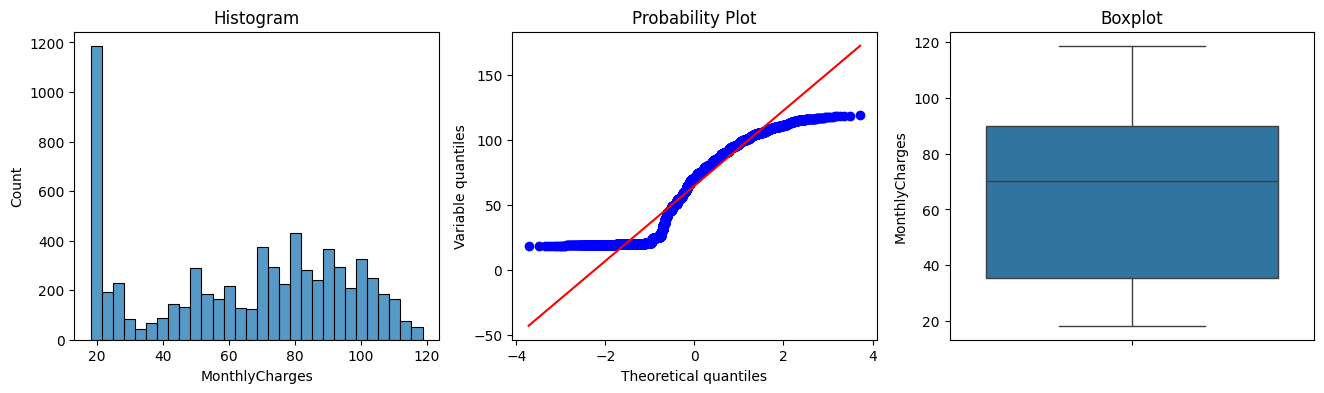

In [28]:
# memvisualisasikan setelah outlier handling di MonthlyCharges
check_plot(df,'MonthlyCharges')

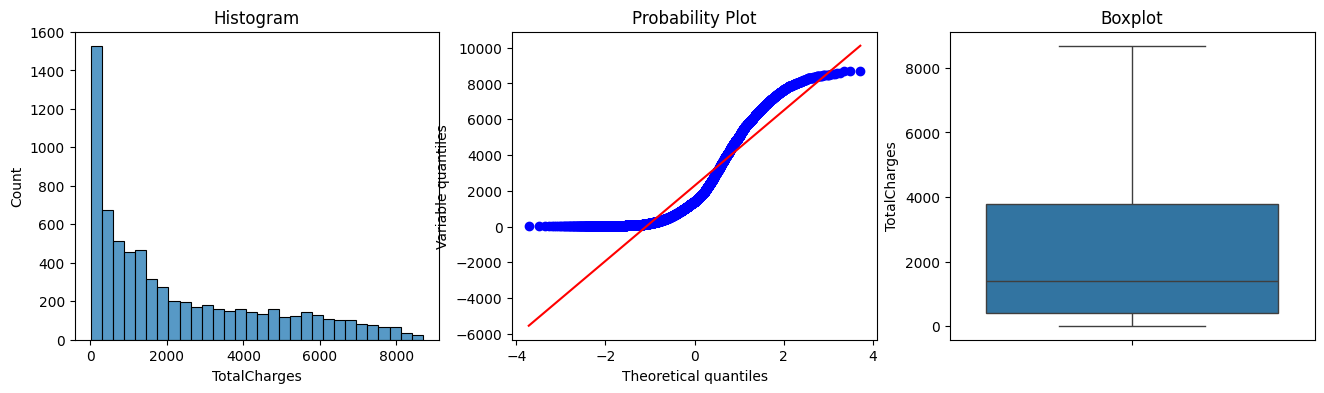

In [29]:
# memvisualisasikan setelah outlier handling di TotalCharges
check_plot(df_new,'TotalCharges')

## Label Encoder

In [30]:
from sklearn.preprocessing import LabelEncoder

# Kolom-kolom yang ingin di-label encode
columns_to_encode = ['Churn', 'PaperlessBilling', 'StreamingMovies', 
                     'StreamingTV','TechSupport','DeviceProtection',
                     'OnlineBackup','OnlineSecurity','MultipleLines',
                     'PhoneService','Dependents','Partner']

# Inisialisasi LabelEncoder
labelEncoder = LabelEncoder()

In [31]:
# Menerapkan label encoding ke dataset
for col in columns_to_encode:
    df[col] = labelEncoder.fit_transform(df[col])

In [32]:
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= customerID =================


customerID
3186-AJIEK    1
7590-VHVEG    1
5575-GNVDE    1
8775-CEBBJ    1
2823-LKABH    1
             ..
6713-OKOMC    1
1452-KIOVK    1
9305-CDSKC    1
9237-HQITU    1
7795-CFOCW    1
Name: count, Length: 7043, dtype: int64


============= gender =================


gender
Male      3555
Female    3488
Name: count, dtype: int64


============= SeniorCitizen =================


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


============= Partner =================


Partner
0    3641
1    3402
Name: count, dtype: int64


============= Dependents =================


Dependents
0    4933
1    2110
Name: count, dtype: int64


============= tenure =================


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


============= PhoneService =================


PhoneService
1    6361
0     682
Name: count, dtype: int64


============= MultipleLines =================


MultipleLines
0    4072
1    2971
Name: count, dtype: int64


============= InternetService =================


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


============= OnlineSecurity =================


OnlineSecurity
0    5024
1    2019
Name: count, dtype: int64


============= OnlineBackup =================


OnlineBackup
0    4614
1    2429
Name: count, dtype: int64


============= DeviceProtection =================


DeviceProtection
0    4621
1    2422
Name: count, dtype: int64


============= TechSupport =================


TechSupport
0    4999
1    2044
Name: count, dtype: int64


============= StreamingTV =================


StreamingTV
0    4336
1    2707
Name: count, dtype: int64


============= StreamingMovies =================


StreamingMovies
0    4311
1    2732
Name: count, dtype: int64


============= Contract =================


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64


============= PaperlessBilling =================


PaperlessBilling
1    4171
0    2872
Name: count, dtype: int64


============= PaymentMethod =================


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64


============= MonthlyCharges =================


MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
56.85      1
101.70     1
48.40      1
108.35     1
72.00      1
Name: count, Length: 1585, dtype: int64


============= TotalCharges =================


TotalCharges
20.200      11
1397.475    11
19.750       9
19.650       8
19.900       8
            ..
1990.500     1
7362.900     1
346.450      1
306.600      1
108.150      1
Name: count, Length: 6531, dtype: int64


============= Churn =================


Churn
0    5174
1    1869
Name: count, dtype: int64

## Mean Encoder

Mean Encoding digunakan untuk mengklasifikasikan contract berdasarkan rata-rata churn dalam kategori tertentu dari kolom kontrak

In [33]:
df_mean_encoding = df.copy()

In [34]:
mean_encoding = df_mean_encoding.groupby(['Contract'])['Churn'].mean().to_dict()
mean_encoding

{'Month-to-month': 0.4270967741935484,
 'One year': 0.11269517990495587,
 'Two year': 0.02831858407079646}

In [35]:
df_mean_encoding['Contract'] = df_mean_encoding['Contract'].map(mean_encoding)

## RFE (Recursive Feature Elimination) untuk Menentukan Fitur Target

In [36]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [37]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [38]:
# Menghapus kolom customerID karena kurang relevan
df_rfe = df.drop(columns=['customerID'])

In [39]:
# Kolom-kolom yang ingin di-label encode untuk RFE
columns_to_encode_rfe = ['gender','InternetService','Contract','PaymentMethod']

# Menerapkan label encoding ke dataset
for col in columns_to_encode_rfe:
    df_rfe[col] = labelEncoder.fit_transform(df_rfe[col])

#### Label Encoding untuk RFE

PaymentMethod :
1. Electronic check             = 2
2. Mailed check                 = 3
3. Bank transfer (automatic)    = 0
4. Credit card (automatic)      = 1

Contract :
1. Month-to-month       = 0
2. Two year             = 2
3. One year             = 1

InternetService :
1. Fiber optic  = 1
2. DSL          = 0
3. No           = 2

gender :
1. Male     = 1
2. Female   = 0

In [40]:
# Memisahkan X dan y sebagai Fitur dan Target dalam RFE
X = df_rfe.drop(columns=['Churn'])  
y = df_rfe['Churn']

In [41]:
# Inisialisasi model Logistic Regression
model = LogisticRegression(max_iter=200)

# Inisialisasi RFE untuk memilih semua fitur (karena ingin cek semua fitur)
rfe = RFE(estimator=model, n_features_to_select=5)

# Fitting RFE ke data
rfe.fit(X, y)

# Menampilkan fitur yang dipilih
print("Fitur yang dipilih:", X.columns[rfe.support_])
print("Ranking fitur:", dict(zip(X.columns, rfe.ranking_)))

Fitur yang dipilih: Index(['OnlineSecurity', 'TechSupport', 'StreamingMovies', 'Contract',
       'PaperlessBilling'],
      dtype='object')
Ranking fitur: {'gender': np.int64(12), 'SeniorCitizen': np.int64(4), 'Partner': np.int64(14), 'Dependents': np.int64(3), 'tenure': np.int64(11), 'PhoneService': np.int64(8), 'MultipleLines': np.int64(6), 'InternetService': np.int64(13), 'OnlineSecurity': np.int64(1), 'OnlineBackup': np.int64(5), 'DeviceProtection': np.int64(9), 'TechSupport': np.int64(1), 'StreamingTV': np.int64(2), 'StreamingMovies': np.int64(1), 'Contract': np.int64(1), 'PaperlessBilling': np.int64(1), 'PaymentMethod': np.int64(7), 'MonthlyCharges': np.int64(10), 'TotalCharges': np.int64(15)}


## Pemisahan Dataset menjadi Fitur dan Target

In [42]:
df_ml = df_rfe.copy()

In [43]:
selected_features = ['PaperlessBilling', 'Contract', 'StreamingMovies', 'TechSupport','OnlineSecurity']

In [44]:
# Pisahkan fitur (X) dan target (y)|
feature = df_ml[selected_features]
target = df_ml['Churn']

### Library Model Machine Learning

In [45]:
dt_model = DecisionTreeClassifier(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [46]:
# Pisahkan data menjadi train (80%) dan test (20%)
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42, stratify=target)

In [47]:
# 🔹 Model 1: Decision Tree
dt_model.fit(feature_train, target_train)
dt_pred = dt_model.predict(feature_test)
dt_acc = accuracy_score(target_test, dt_pred)

In [48]:
# 🔹 Model 2: Random Forest
rf_model.fit(feature_train, target_train)
rf_pred = rf_model.predict(feature_test)
rf_acc = accuracy_score(target_test, rf_pred)

In [49]:
# 🔹 Model 3: XGBoost
xgb_model.fit(feature_train, target_train)
xgb_pred = xgb_model.predict(feature_test)
xgb_acc = accuracy_score(target_test, xgb_pred)

## Evaluasi Model

In [50]:
# 🔹 Evaluasi Model dan Simpan dalam DataFrame
metrics_df = pd.DataFrame([
    {
        "Model": "Decision Tree",
        "Accuracy": accuracy_score(target_test, dt_pred),
        "Precision": precision_score(target_test, dt_pred),
        "Recall": recall_score(target_test, dt_pred),
        "F1-Score": f1_score(target_test, dt_pred),
        "ROC AUC": roc_auc_score(target_test, dt_pred)
    },
    {
        "Model": "Random Forest",
        "Accuracy": accuracy_score(target_test, rf_pred),
        "Precision": precision_score(target_test, rf_pred),
        "Recall": recall_score(target_test, rf_pred),
        "F1-Score": f1_score(target_test, rf_pred),
        "ROC AUC": roc_auc_score(target_test, rf_pred)
    },
    {
        "Model": "XGBoost",
        "Accuracy": accuracy_score(target_test, xgb_pred),
        "Precision": precision_score(target_test, xgb_pred),
        "Recall": recall_score(target_test, xgb_pred),
        "F1-Score": f1_score(target_test, xgb_pred),
        "ROC AUC": roc_auc_score(target_test, xgb_pred)
    }
])

In [51]:
# 🔹 Menampilkan DataFrame
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Decision Tree,0.753726,0.534527,0.558824,0.546405,0.691489
1,Random Forest,0.753726,0.534527,0.558824,0.546405,0.691489
2,XGBoost,0.753726,0.534527,0.558824,0.546405,0.691489


## Karena nilainya sama disemua model, maka dilakukan scaller untuk mencoba alternatif cara

`Alternatif ini yaitu menggunakan semua fitur kecuali Churn dan customerID kedalam Feature dan menjadikan churn sebagai Target. Selain itu, melakukan scalling sebelum menjalankan model`

In [52]:
df_ml_alter = df_rfe.copy()

In [53]:
df_ml_alter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


In [54]:
# Pisahkan fitur (X) dan target (y)
X = df_ml_alter.drop(columns=['Churn'])
y = df_ml_alter['Churn']

In [55]:
# Pisahkan data menjadi train (80%) dan test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek bentuk data
print("Ukuran X_train:", X_train.shape)
print("Ukuran X_test:", X_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)

Ukuran X_train: (5634, 19)
Ukuran X_test: (1409, 19)
Ukuran y_train: (5634,)
Ukuran y_test: (1409,)


In [56]:
scaler = StandardScaler()
scaler.fit(X_train)
X_std = scaler.transform(X_train)

In [57]:
from sklearn.model_selection import cross_val_score
# Cross-validation dengan f1_score sebagai metric
cv_scores = cross_val_score(rf_model, X_std, target_train, cv=5, scoring='f1')

# Print hasil
print("F1-score rata-rata:", cv_scores)
print("F1-score rata-rata:", cv_scores.mean())

F1-score rata-rata: [0.57620818 0.57142857 0.53154876 0.53308824 0.536862  ]
F1-score rata-rata: 0.5498271492224482


`Menghapus TotalCharges, gender, InternetService, Partner, tenure, MonthlyCharges karena memiliki nilai RFE yang besar dan tidak berpengaruh`

In [58]:
df_ml_alter_2 = df_rfe.copy()

In [59]:
# Pisahkan fitur (X) dan target (y)
X1 = df_ml_alter_2.drop(columns=['Churn','TotalCharges','gender','InternetService','Partner','tenure','MonthlyCharges'])
y1= df_ml_alter_2['Churn']

In [60]:
# Pisahkan data menjadi train (80%) dan test (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

# Cek bentuk data
print("Ukuran X_train:", X_train1.shape)
print("Ukuran X_test:", X_test1.shape)
print("Ukuran y_train:", y_train1.shape)
print("Ukuran y_test:", y_test1.shape)

Ukuran X_train: (5634, 13)
Ukuran X_test: (1409, 13)
Ukuran y_train: (5634,)
Ukuran y_test: (1409,)


In [61]:
scaler = StandardScaler()
scaler.fit(X_train1)
X_std1 = scaler.transform(X_train1)

In [62]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score, make_scorer

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Definisi scorer untuk F1 score hanya untuk label 1
scorer = make_scorer(f1_score, pos_label=1)

# Melakukan cross-validation dan menghitung skor
scores = cross_val_score(model, X_std1, y_train1, cv=kf, scoring=scorer)
scores, scores.mean()

(array([0.51711027, 0.43478261, 0.55793991, 0.45490196, 0.43548387,
        0.42741935, 0.47346939, 0.5       , 0.49420849, 0.44166667]),
 np.float64(0.47369825242394664))

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier()

# Inisialisasi KFold split dengan 5 kelompok
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics
f1_scores = []
recall_scores = []
precision_scores = []

for train_index, test_index in kf.split(X_std1):
  X_train_, X_val = X_std1[train_index], X_std1[test_index]
  y_train_, y_val = y_train1.values[train_index], y_train1.values[test_index]

  model.fit(X_train_, y_train_)
  y_pred = model.predict(X_val)


  f1_scores.append(f1_score(y_val, y_pred))
  recall_scores.append(precision_score(y_val, y_pred))
  precision_scores.append(f1_score(y_val, y_pred))

f1_mean, mae_std = np.mean(f1_scores), np.std(f1_scores)
recall_mean, recall_std = np.mean(recall_scores), np.std(recall_scores)
precision_mean,precision_std = np.mean(precision_scores), np.std(precision_scores)

kf.split(X_std1) membagi dataset menjadi beberapa bagian sesuai jumlah K-Fold (misalnya, K=5 artinya dataset dibagi menjadi 5 subset).


train_index berisi indeks data yang digunakan untuk training.


test_index berisi indeks data yang digunakan untuk validasi/testing.


`X_train_, X_val = X_std1[train_index], X_std1[test_index]`


Membagi fitur (X_std1) berdasarkan indeks hasil split:

X_train_ → Data training (menggunakan indeks train_index).


X_val → Data validasi/testing (menggunakan indeks test_index).


`y_train_, y_val = y_train1.values[train_index], y_train1.values[test_index]`


Memisahkan label (y_train1) berdasarkan indeks split yang sama:
1. y_train_ → Label training.
2. y_val → Label validasi/testing.
Kenapa .values digunakan?


y_train1 adalah pandas Series, dan .values mengubahnya menjadi array numpy (numpy.ndarray).


Ini memastikan slicing menggunakan indeks (train_index, test_index) berjalan dengan benar.


` K-Fold Cross-Validation:` Model diuji pada beberapa subset data, sehingga performanya lebih akurat dan tidak bergantung pada satu set data tertentu

 
🔹 X_train_ & y_train_ → Digunakan untuk melatih model


🔹 X_val & y_val → Digunakan untuk menguji model

In [64]:
f1_mean, mae_std

(np.float64(0.5093603984326859), np.float64(0.015823134997427723))

In [65]:
recall_mean, recall_std

(np.float64(0.5508320296382674), np.float64(0.025593021594183533))

In [66]:
precision_mean,precision_std

(np.float64(0.5093603984326859), np.float64(0.015823134997427723))

In [67]:
X_test1.head()

,SeniorCitizen,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
437,0,1,1,1,1,1,1,1,1,1,2,1,1
2280,1,0,1,1,0,0,0,1,1,1,0,1,1
2235,0,1,1,1,1,1,1,0,1,0,1,1,1
4460,0,0,1,0,0,0,1,1,0,0,0,0,2
3761,0,0,1,1,1,1,1,0,1,1,2,1,1


In [68]:
X_test1.isnull().sum()

SeniorCitizen       0
Dependents          0
PhoneService        0
MultipleLines       0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
dtype: int64

## Evaluation pada Alternate Case

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_pred))

# Menggunakan y_val karena nilai target sudah dimasukkan kedalam fitur yang berbeda dengan x_val (yang berisi nilai X)
# Cara diatas menggunakan K-Fold Cross Validation berguna untuk membagi dataset menjadi beberapa subset agar model bisa dilatih dan diuji secara bergantian.

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       815
           1       0.56      0.47      0.51       311

    accuracy                           0.75      1126
   macro avg       0.69      0.66      0.67      1126
weighted avg       0.74      0.75      0.75      1126



# Kesimpulan dari Project Supervised Learning Minggu ini:

### **🧐 Analisis Classification Report**

#### **1️⃣ Kelas 0 (Tidak Churn)**
| Metrik      | Nilai  |
|------------|--------|
| **Precision**  | 0.81 (Dari semua yang diprediksi **tidak churn**, 81% benar) |
| **Recall**     | 0.85 (Dari semua yang **sebenarnya tidak churn**, 85% terdeteksi dengan benar) |
| **F1-score**   | 0.83 (Keseimbangan antara precision dan recall) |
| **Support**    | 815 sampel |

✅ **Model lebih baik dalam mendeteksi pelanggan yang tetap (tidak churn).**

---

#### **2️⃣ Kelas 1 (Churn)**
| Metrik      | Nilai  |
|------------|--------|
| **Precision**  | 0.55 (Dari semua yang diprediksi **churn**, hanya 55% yang benar) |
| **Recall**     | 0.47 (Dari semua pelanggan yang **sebenarnya churn**, hanya 47% yang terdeteksi) |
| **F1-score**   | 0.50 (Kurang optimal, karena precision dan recall rendah) |
| **Support**    | 311 sampel |

⚠️ **Model kurang baik dalam mendeteksi pelanggan yang churn** (recall hanya 47%).

---

#### **3️⃣ Keseluruhan Evaluasi**
| Metrik        | Nilai  |
|--------------|--------|
| **Accuracy**   | 0.75 (Model secara keseluruhan benar 75% dari total 1126 sampel) |
| **Macro avg**  | 0.68 precision, 0.66 recall, 0.67 F1-score (**Rata-rata tanpa mempertimbangkan jumlah sampel**) |
| **Weighted avg** | 0.73 precision, 0.75 recall, 0.74 F1-score (**Rata-rata mempertimbangkan jumlah sampel, lebih mendekati kelas 0 karena dominan**) |

---

### **Kesimpulan:**  
✅ **Model cukup baik dalam memprediksi pelanggan yang tetap (kelas 0).**  
⚠️ **Kurang optimal dalam mendeteksi pelanggan yang churn (kelas 1), recall hanya 47%.**  
💡 **Solusi?** Bisa mencoba **oversampling (SMOTE)** atau **cost-sensitive learning** agar model lebih fokus pada kelas 1.
